In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn

from IPython.display import HTML, Image

plt.style.use('seaborn-darkgrid')

# Python Data Structures
Different types and ways of holding data. Essentially variables.
* Built-in common types:
    * Scalar (single-value):   
        `str`, `int`, `float`, `bool`, `complex`, ...
        
    * Compound (multi-value):   
        `list`, `dict`, `tuple`, `set`, ... 
        
    * Fancy things:  
        `datetime`  
        [`collections`](https://docs.python.org/3/library/collections.html):    
        `namedtuple`, `defaultdict`, `deque`, `Counter`, ...
        
    * `numpy`:  
        `numpy.array`

## Scalar

Most familiar with these types.

In [2]:
foo = 42                 # int
bar = 'meaning of life'  # str
baz = 3.14158            # float
bam = False              # bool
moo = 42j                # complex uses 'j'

In [3]:
print(foo * baz)

131.94636


In [4]:
print(foo * bar)

meaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of lifemeaning of life


In [5]:
print(foo * bam)

0


## Compound

Mostly familiar with these types, especially `list` and `dict`.

In [6]:
foo = [1, 2, 3, 4, 5]

bar = {
    'stars': 1e12,
    'galaxies': 1000,
    'black_holes': 1
}

In [7]:
print(f"There are approx {bar['stars']} in a monolith.")

There are approx 1000000000000.0 in a monolith.


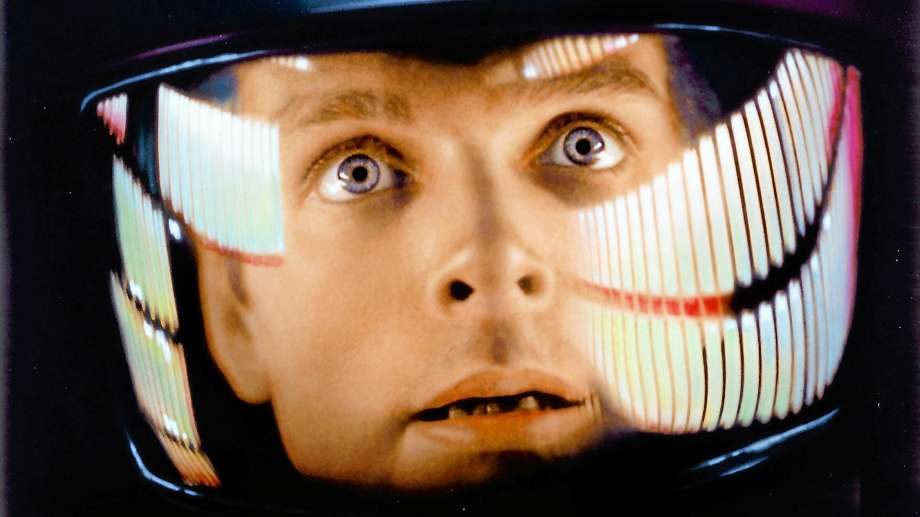

In [8]:
Image('https://s.hdnux.com/photos/63/02/07/13377985/3/920x920.jpg')

In [9]:
for i in foo:
    print(i)

1
2
3
4
5


In [10]:
for obj, num in bar.items():
    print(f"There are {num} {obj} in the Milky Way")

There are 1000000000000.0 stars in the Milky Way
There are 1000 galaxies in the Milky Way
There are 1 black_holes in the Milky Way


## More on dictionaries

Wilfred says, "The most useful of data types"

Think of a dictionary as a way to hold and organize all of your other variables but with convenient <span style="text-decoration: line-through">semantic labelling</span> names.

In [11]:
location = {
    'name': "Macquarie University",
    'latitude': 33.7771,      # degrees
    'longitude': 151.1180,    # degrees
    'elevation': 100,         # meters
    'pressure': 1000,         # mbar 
    'horizon': 30,            # degrees
    'timezone': 'Australia/Sydney', 
}

location

{'name': 'Macquarie University',
 'latitude': 33.7771,
 'longitude': 151.118,
 'elevation': 100,
 'pressure': 1000,
 'horizon': 30,
 'timezone': 'Australia/Sydney'}

We can then use this dictonary in various ways:

In [12]:
from astroplan import Observer
from astropy import units as u

mqu = Observer(
    longitude=location['longitude'] * u.deg,
    latitude=location['latitude'] * u.deg,
    elevation=location['elevation'] * u.meter,
    timezone=location['timezone'],
    name=location['name']
)

mqu


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


<Observer: name='Macquarie University',
    location (lon, lat, el)=(151.118 deg, 33.7771 deg, 100.00000000009364 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>

/storage/miniconda3/envs/panoptes/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


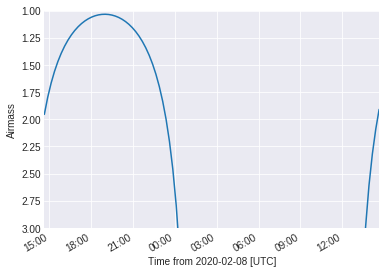

In [13]:
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
from astropy.time import Time
from astroplan.plots import plot_airmass 

alpha_centauri = FixedTarget.from_name('Arcturus')

plot_airmass(alpha_centauri, mqu, Time.now() + 1 * u.hour);

## But...

What happens when we need to use this information a number of different scripts or programs?

* Copy and paste `location` into every script we run?
* What if our `elevation` were incorrect? (Which we only discover after copying-and-pasting 1000 times)

## Serialization

> ...serialization (or serialisation) is the process of translating data structures or object state into a format that can be stored (for example, in a file or memory buffer) or transmitted (for example, across a network connection link) and reconstructed later (possibly in a different computer environment). 

> When the resulting series of bits is reread according to the serialization format, it can be used to create a semantically identical clone of the original object. 

https://en.wikipedia.org/wiki/Serialization

<span style="color: red; font-size: 48px">Save stuff. Use it later.</span>

## Pickle

Built-in Python serialiation format.

* Python only.
* Not human readable.
* They say it's slow.

## JSON and YAML

Easy-peasy serialization.

#### JAY-sun
JavaScript Object Notation


#### /ˈjæməl/  (think camel)
Yet Another Markup Language

## Advantages

* Any language
* Human-readable*
* Faster

*JSON isn't super friendly

The basic idea with serialization is to convert your object into a text string*, which can be saved to a regular file.

When you want to use the object you deserialize the string and have the same object.

Serialize: `object` -> `string`  
Deseriialize: `string` -> `object`


*Can be converted to bytes (i.e. jsonb), not discussed here.

### Differences between YAML and JSON

[Stolen from here](https://www.json2yaml.com/yaml-vs-json)


#### YAML vs JSON
YAML is best suited for configuration where JSON is better as a serialization format or serving up data for your APIs.

In some cases, YAML has a couple of big advantages over JSON, including:

* **comments**
* ability to self reference
* support for complex datatypes
* more...

**Write your configuration files in YAML format where you have the opportunity - it is designed to be readable and editable by humans.**

#### JSON vs YAML
JSON wins as a serialization format. 

* It is more explicit and more suitable for data interchange between your apis.
* YAML is a superset of JSON, which means you can parse JSON with a YAML parser. (Wilfred says "Don't do this")
* Try mixing JSON and YAML in the same document: `[..., ..]` for annotating arrays and `{ "foo" : "bar"}` for objects. (Wilfred says "Don't do this either.")

### JSON

Machines talking to machines

### YAML

Humans talking to machines (and vice versa)

Let's take another look at our `location` object:

In [14]:
location

{'name': 'Macquarie University',
 'latitude': 33.7771,
 'longitude': 151.118,
 'elevation': 100,
 'pressure': 1000,
 'horizon': 30,
 'timezone': 'Australia/Sydney'}

In [15]:
import json  # Part of Python standard library

json.dumps(location)

'{"name": "Macquarie University", "latitude": 33.7771, "longitude": 151.118, "elevation": 100, "pressure": 1000, "horizon": 30, "timezone": "Australia/Sydney"}'

In [16]:
# It is just a string
type(json.dumps(location))

str

In [17]:
# We can save to a file
with open('my_location.json', 'w') as f:
    f.write(json.dumps(location))

In [18]:
# Using shell commands from Jupyter with exclamation point
!ls -l

total 104
-rw-r--r-- 1 wtgee wtgee  4045 Feb  9 11:54  config.yaml
-rw-r--r-- 1 wtgee wtgee 75096 Feb  9 12:16  IntroPython.ipynb
-rw-r--r-- 1 wtgee wtgee   158 Feb  9 12:38  my_location.json
-rw-r--r-- 1 wtgee wtgee   555 Feb  9 11:10 'Python I.ipynb'
-rw-r--r-- 1 wtgee wtgee  1530 Feb  9 12:36  README.md
-rw-r--r-- 1 wtgee wtgee    28 Feb  9 12:07  requirements.txt
drwxr-xr-x 2 wtgee wtgee  4096 Feb  9 11:54  scripts
-rw-r--r-- 1 wtgee wtgee  2964 Feb  9 12:05  Use-Planet-Config.ipynb


In [19]:
!cat my_location.json

{"name": "Macquarie University", "latitude": 33.7771, "longitude": 151.118, "elevation": 100, "pressure": 1000, "horizon": 30, "timezone": "Australia/Sydney"}

In [20]:
import yaml  # pip install pyyaml - or pip install ruamel.yaml

yaml.dump(location)

'elevation: 100\nhorizon: 30\nlatitude: 33.7771\nlongitude: 151.118\nname: Macquarie University\npressure: 1000\ntimezone: Australia/Sydney\n'

In [21]:
type(yaml.dump(location))

str

In [22]:
# We can save to a file
with open('my_location.yaml', 'w') as f:
    f.write(yaml.dump(location))

In [23]:
!ls -l

total 108
-rw-r--r-- 1 wtgee wtgee  4045 Feb  9 11:54  config.yaml
-rw-r--r-- 1 wtgee wtgee 75096 Feb  9 12:16  IntroPython.ipynb
-rw-r--r-- 1 wtgee wtgee   158 Feb  9 12:38  my_location.json
-rw-r--r-- 1 wtgee wtgee   133 Feb  9 12:38  my_location.yaml
-rw-r--r-- 1 wtgee wtgee   555 Feb  9 11:10 'Python I.ipynb'
-rw-r--r-- 1 wtgee wtgee  1530 Feb  9 12:36  README.md
-rw-r--r-- 1 wtgee wtgee    28 Feb  9 12:07  requirements.txt
drwxr-xr-x 2 wtgee wtgee  4096 Feb  9 11:54  scripts
-rw-r--r-- 1 wtgee wtgee  2964 Feb  9 12:05  Use-Planet-Config.ipynb


In [24]:
!cat my_location.yaml

elevation: 100
horizon: 30
latitude: 33.7771
longitude: 151.118
name: Macquarie University
pressure: 1000
timezone: Australia/Sydney


### YAML as super-fancy persistent dictionary

YAML (and JSON) handle all built-in types.*

This means it can handle an array in a dict in a dict, etc.


*You can also handle fancy types such as `datetime`, `numpy.array`, etc. Only slightly more involved.

In [25]:
foobar = {
    'baz': {
        'bar': [1, 2, 3, 4, 5],
        'bam': [
            {'one': 1},
            {'two': 2}
        ]
    },
    'moo': 42,
    'boo': "Hello World"
}

foobar

{'baz': {'bar': [1, 2, 3, 4, 5], 'bam': [{'one': 1}, {'two': 2}]},
 'moo': 42,
 'boo': 'Hello World'}

In [26]:
json.dumps(foobar)

'{"baz": {"bar": [1, 2, 3, 4, 5], "bam": [{"one": 1}, {"two": 2}]}, "moo": 42, "boo": "Hello World"}'

In [27]:
yaml.dump(foobar)

'baz:\n  bam:\n  - one: 1\n  - two: 2\n  bar:\n  - 1\n  - 2\n  - 3\n  - 4\n  - 5\nboo: Hello World\nmoo: 42\n'

### A real configuation file

Here we write out all of our configuration details in a big YAML file called `config.yaml`.

In [28]:
!cat config.yaml

---
######################### PANOPTES UNIT ########################################
# name:   Can be anything you want it to be. This name is displayed in several
#         places and should be a "personal" name for the unit.
#
# pan_id: This is an identification number assigned by the PANOPTES team and is
#         the official designator for your unit. This id is used to store image
#         files and communicate with the Google Cloud network.
#
#         Leave the pan_id at `PAN000` for testing until you have been assigned
#         an official id. Update pocs_local.yaml with offical name once received.
################################################################################
name: Generic PANOPTES Unit
pan_id: PAN000   

location:
    name: Mauna Loa Observatory
    latitude: 19.54 # Degrees
    longitude: -155.58 # Degrees
    elevation: 3400.0 # Meters
    horizon: 30 # Degrees; targets must be above this to be considered valid.
    flat_horizon: -6 # Degrees - Flats whe

Accessing this file is as simple as loading it:

In [29]:
# Note the use of `safe_load`
with open('config.yaml', 'r') as f:
    my_config = yaml.safe_load(f.read())

In [30]:
my_config

{'name': 'Generic PANOPTES Unit',
 'pan_id': 'PAN000',
 'location': {'name': 'Mauna Loa Observatory',
  'latitude': 19.54,
  'longitude': -155.58,
  'elevation': 3400.0,
  'horizon': 30,
  'flat_horizon': -6,
  'focus_horizon': -12,
  'observe_horizon': -18,
  'timezone': 'US/Hawaii',
  'gmt_offset': -600},
 'directories': {'base': '/var/panoptes',
  'images': 'images',
  'data': 'data',
  'resources': 'POCS/resources/',
  'targets': 'POCS/resources/targets',
  'mounts': 'POCS/resources/mounts'},
 'db': {'name': 'panoptes', 'type': 'file'},
 'scheduler': {'type': 'dispatch',
  'fields_file': 'simple.yaml',
  'check_file': False},
 'mount': {'brand': 'ioptron',
  'model': 30,
  'driver': 'ioptron',
  'serial': {'port': '/dev/ttyUSB0', 'timeout': 0.0, 'baudrate': 9600},
  'non_sidereal_available': True},
 'pointing': {'auto_correct': False,
  'threshold': 500,
  'exptime': 30,
  'max_iterations': 3},
 'cameras': {'auto_detect': True,
  'primary': '14d3bd',
  'devices': [{'model': 'canon_

In [31]:
location = my_config['location']

location

{'name': 'Mauna Loa Observatory',
 'latitude': 19.54,
 'longitude': -155.58,
 'elevation': 3400.0,
 'horizon': 30,
 'flat_horizon': -6,
 'focus_horizon': -12,
 'observe_horizon': -18,
 'timezone': 'US/Hawaii',
 'gmt_offset': -600}

Let's make ourselves a quick load function:

In [32]:
def load_config(filename):
    with open(filename, 'r') as f:
        my_config = yaml.safe_load(f.read())
        
    return my_config

### Change file externally

Change the file outside the script, then re-read

In [33]:
my_config = load_config('config.yaml')

In [34]:
my_config

{'name': 'Generic PANOPTES Unit',
 'pan_id': 'PAN000',
 'location': {'name': 'Mauna Loa Observatory',
  'latitude': 19.54,
  'longitude': -155.58,
  'elevation': 3400.0,
  'horizon': 30,
  'flat_horizon': -6,
  'focus_horizon': -12,
  'observe_horizon': -18,
  'timezone': 'US/Hawaii',
  'gmt_offset': -600},
 'directories': {'base': '/var/panoptes',
  'images': 'images',
  'data': 'data',
  'resources': 'POCS/resources/',
  'targets': 'POCS/resources/targets',
  'mounts': 'POCS/resources/mounts'},
 'db': {'name': 'panoptes', 'type': 'file'},
 'scheduler': {'type': 'dispatch',
  'fields_file': 'simple.yaml',
  'check_file': False},
 'mount': {'brand': 'ioptron',
  'model': 30,
  'driver': 'ioptron',
  'serial': {'port': '/dev/ttyUSB0', 'timeout': 0.0, 'baudrate': 9600},
  'non_sidereal_available': True},
 'pointing': {'auto_correct': False,
  'threshold': 500,
  'exptime': 30,
  'max_iterations': 3},
 'cameras': {'auto_detect': True,
  'primary': '14d3bd',
  'devices': [{'model': 'canon_

In [35]:
planet_names = [
    'Alpha',
    'Beta',
    'Gamma',
    'Bob'
]

In [36]:
planets = dict()

# Generate a random number of fake light-curves
for i, name in enumerate(planet_names):
    # Random number between 1 - 5
    light_curves = list()
    for j in range(np.random.randint(1, 5)):
    
        # Generate a light curve
        lc0 = np.random.normal(1, 0.1, size=100)
    
        # Set up file names
        planet_directory_name = f'data/planet_{i:003d}'
        # Create our directory
        os.makedirs(planet_directory_name, exist_ok=True)
        
        # Set up json filename
        lc_filename = f'{planet_directory_name}/lc_{j:003d}.json'
        
        # Save light curve to a json file (probably not ideal)
        with open(lc_filename, 'w') as f:
            f.write(json.dumps(list(lc0)))
    
        # Add the name of our file to the list
        light_curves.append(lc_filename)
        
    # Save to our big list
    planets[name] = light_curves

In [37]:
# Look at our config
planets

{'Alpha': ['data/planet_000/lc_000.json',
  'data/planet_000/lc_001.json',
  'data/planet_000/lc_002.json'],
 'Beta': ['data/planet_001/lc_000.json',
  'data/planet_001/lc_001.json',
  'data/planet_001/lc_002.json',
  'data/planet_001/lc_003.json'],
 'Gamma': ['data/planet_002/lc_000.json',
  'data/planet_002/lc_001.json',
  'data/planet_002/lc_002.json'],
 'Bob': ['data/planet_003/lc_000.json', 'data/planet_003/lc_001.json']}

In [38]:
# Save our config to a yaml file
with open('planet_config.yaml', 'w') as f:
    f.write(yaml.dump(planets))

In [39]:
!cat planet_config.yaml

Alpha:
- data/planet_000/lc_000.json
- data/planet_000/lc_001.json
- data/planet_000/lc_002.json
Beta:
- data/planet_001/lc_000.json
- data/planet_001/lc_001.json
- data/planet_001/lc_002.json
- data/planet_001/lc_003.json
Bob:
- data/planet_003/lc_000.json
- data/planet_003/lc_001.json
Gamma:
- data/planet_002/lc_000.json
- data/planet_002/lc_001.json
- data/planet_002/lc_002.json


### A different script

Now we go to an entirely different script: [Use Planet Config](Use-Planet-Config.ipynb)